## Observations and Insights

## Dependencies and starter code

In [19]:
%matplotlib notebook

In [20]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [21]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"


In [22]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [23]:
#Combine data together: 

merged_data_df=pd.merge(mouse_metadata,study_results)



In [24]:
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

#I created a groupby to get the data sorted into categories by each Drug Regiment so that I can now run statistical 
#analysis on

summary_stats = merged_data_df.groupby(['Drug Regimen'])

In [8]:
dict(list (summary_stats))

{'Capomulin':      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 10       s185    Capomulin  Female           3          17          0   
 11       s185    Capomulin  Female           3          17          5   
 12       s185    Capomulin  Female           3          17         10   
 13       s185    Capomulin  Female           3          17         15   
 14       s185    Capomulin  Female           3          17         20   
 15       s185    Capomulin  Female           3          17         25   
 16       s185    Capomulin  Female           3          17         30   
 17       s185    Capomulin  Female           3          17         35   
 18       s185    Capomulin  Female           3          17         40   
 19       s185    Capomulin  Female           3          17         45   
 20       x401    Capomulin  Female          16          15          0   
 21       x401    Capomulin  Female          16          15          5   
 22       x401    Capomul

In [9]:
#Gives group list of treatments
summary_stats.groups.keys()

dict_keys(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

In [10]:
# By doing a .describe I am able to get a summary of statistics (mean, median, variance, standard deviation) for each regimen 
summary_stats.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar plots

In [11]:
x = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas 

#First, I counted the datapoints for each treatment regimen and called it my y for the y-axis

y=merged_data_df['Drug Regimen'].value_counts()

In [13]:
y

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


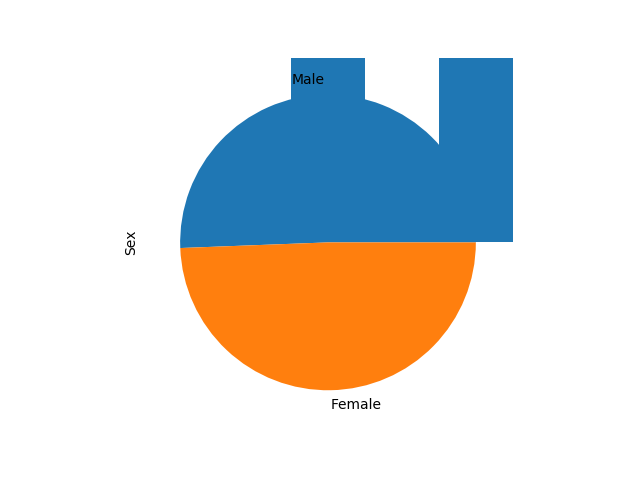

In [14]:
#creating this bar chart through pandas allows us to see the data points/amounts for each treatment regimen

merged_data_df['Drug Regimen'].value_counts().plot.bar()

In [15]:
np.arange(0,len('Drug Regimen'))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
#def plot_bar_x():
index = np.arange(len('Drug Regimen'))
plt.bar(index,y)
plt.title("The Amount of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("The Amount per Drug Regimen")
plt.xticks(index,label)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [114]:
plt.show()

## Pie plots

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merged_data_df['Sex'].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

In [18]:
merged_data_df['Sex'].value_counts().plot.pie()


In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
def pie_plot(): 
    labels = ["Females", "Males"]
    counts= [935,958]
    colors = ["pink","blue"]
    plt.title("Female Mice vs. Male Mice")
    plt.pie(counts,labels=labels,colors=colors,shadow=True,startangle=90)
    plt.axis('equal')
    plt.show()
    

In [151]:
pie_plot()

## Quartiles, outliers and boxplots

In [224]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
final_tumor_volumes=merged_data_df.groupby('Drug Regime', "Tumor Volume (mm3)").sum()
final_tumor_volumes
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

ValueError: No axis named Tumor Volume (mm3) for object type <class 'type'>

In [ ]:
#From the bar chart we can conclude that the most promising treatment regimens are Capomulin, Ketapril,Naftisol,Ramicane

In [188]:
sort_df= summary_stats.apply(lambda _df: _df.sort_values(by=['Tumor Volume(mm3)'])

SyntaxError: unexpected EOF while parsing (<ipython-input-188-ef293b5c9f60>, line 1)

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen